# Notebook

In this notebook, the prepared datasets from [1_Data_Prep](https://github.com/Rudinius/Bike_usage_Bremen/blob/4f39d66836e0585770c37d1cf261b0c0dd95101f/1_Data_Prep.ipynb) are loaded for imputing and preparing for ML models.

<a name="content"></a>
# Content

* [1. Import libraries](#1.)
* [2. Import processed datasets](#2.)
* [3. Adding time features](#3.)
* [4. Imputing missing and non-plausible values](#4.)
* [5. Sin and cosine transformation](#5.)
* [6. Transforming categorical features](#6.)
* [7. Export imputed dataset](#7.)
* [8. Pipeline (Optional)](#8.)


<a name="1."></a>
# 1.&nbsp;Import libraries

[Content](#content)

In [40]:
# Import libraries
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from ipywidgets import interact, widgets

In [41]:
# Following code only relevant when running on Google Colab
# Install package ipyleaflet since it is not part of the standard packages
# of Google Colab

# Uncomment in Google Colab environment
#!pip install pyjanitor

import janitor

ImportError: cannot import name 'ABCPandasArray' from 'pandas.core.dtypes.generic' (c:\projects\bike_usage_bremen\venv\lib\site-packages\pandas\core\dtypes\generic.py)

<a name="2."></a>
# 2.&nbsp;Import processed datasets

[Content](#content)

Next, we will import the processed dataset from [1_Data_Prep](../Bike_usage_Bremen/1_Data_Prep.ipynb).

In [42]:
# Set base url
url = "https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/data/processed/"

In [347]:
# Import full dataset

# We will also parse the date column as datetime64 and set it to the index column
df_full = pd.read_csv(url + "2023-08-11_processed_full.csv",
                         parse_dates=[0], index_col=[0])

# Check the correct loading of dataset
df_full.head()

,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,vacation,holiday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,...,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0,Weihnachtsferien,Neujahr
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,...,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30,Weihnachtsferien,NaN
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,...,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0,Weihnachtsferien,NaN
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,...,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0,Weihnachtsferien,NaN
2013-01-05,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,...,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0,Weihnachtsferien,NaN


We create some constants that will help later with the imputing.

In [348]:
STATION_NAMES = df_full.columns[:12]

<a name="3."></a>
# 3.&nbsp;Adding time features

[Content](#content)

We will first create a copy of the original dataset and create year, month, day and weekday columns.

In [378]:
def add_time_features(df):
    """
        Function that takes as input a DataFrame and returns a changed DataFrame
    """
    
    # Create copy of DataFrame
    df_new = df.copy()
    
    df_new["year"] = df.index.year
    df_new["month"] = df.index.month
    df_new["day"] = df.index.day
    df_new["weekday"] = df.index.dayofweek

    print("Time features added")

    return df_new


In [350]:

df_full_fixed = add_time_features(df_full)

# Check dataframe
df_full_fixed.head()

,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,...,wspd,wpgt,pres,tsun,vacation,holiday,year,month,day,weekday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,...,19.4,50.4,1001.8,0,Weihnachtsferien,Neujahr,2013,1,1,1
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,...,20.2,40.0,1017.5,30,Weihnachtsferien,NaN,2013,1,2,2
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,...,23.8,45.7,1024.5,0,Weihnachtsferien,NaN,2013,1,3,3
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,...,25.2,48.2,1029.5,0,Weihnachtsferien,NaN,2013,1,4,4
2013-01-05,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,...,20.2,41.0,1029.9,0,Weihnachtsferien,NaN,2013,1,5,5


<a name="4."></a>
# 4.&nbsp;Imputing missing and non-plausible values
[Content](#content)

In the analyis so far, we have seen that many 0 values of counting stations seem to be erroneous, as they appear e.g., frequently only for a day always on the same day of month:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_ost.png)

We have also seen, that sometimes the timespan is longer than just a day:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_west.png)

Also there are times, where the value is not 0, but is completely missing like in the following image:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_ost_2.png)

The simplest solution would be to deal with all three cases the same way and to simply use the last valid value and fill forward all missing values. This is what we will do first and then analyze the result.

We will forward fill as below:
* values between $10.0$ (inclusive)
* values greater 3 times the standard deviation above mean
* NaN values

The value $10.0$ for minimum was chosen arbitrarily. It has been shown that the $0$ values are erroneous. However it is difficult to say where the limit is which is also different for each station. As observed from the actual time series data in the last notebook, the limit value of $10$ can be seen as conservative and could probably be set even higher.



In [379]:
# Create a mask that selects all rows with values of zeros and values greater 3 stds (less than 99,7% of values)

def impute_stations(df, cols):
    """
        Function takes in a dataframe and a list of column names (station names) and adds imputed columns
        to the dataframe
    
        Args:
            df (pandas.dataFrame): DataFrame
            cols list):list of column names
    
    """

    # Create copy of DataFrame
    df_new = df.copy()

    def impute_station(station, method="ffill", suffix="imputed_"):
        """
            Creates new column with selected suffix and imputes values of selected
            station that are below 10 (inclusive), nan, or greate 3 std
            with selected method
    
            Args:
                station (str): name of station
                method: one of ffil, bfill or pad
    
        """
        name_of_imputed_column = suffix + station

        # Calculate mean and standard diviation
        mean = np.mean(df_new[station])
        std = np.std(df_new[station])
    
        # Create new column for imputed values
        df_new[name_of_imputed_column] = df_new[station]
    
        # Create mask to fitler aus values greater than 3 std
        mask = (df_new[name_of_imputed_column] > (mean+3*std))
    
        # Set the masked values to np.nan and forward fill all np.nan and zero values
        df_new.loc[mask, name_of_imputed_column] = np.nan
    
        # Create the range of values to be replaced
        # all nan values as well as values below 10 (inclusive)
        values_to_replace = np.arange(-1.0, 11.0)
        values_to_replace[0] = np.nan
    
        # FeatureWarning: `method` needs to be replaced
        df_new[name_of_imputed_column].replace(values_to_replace, method=method, inplace=True)


    # Imputing every station in the in the dataframe
    for station in cols:
    
        impute_station(station)

    print("Stations imputed")
    
    # Return new DataFrame
    return df_new

In [352]:
%%capture
# Suppress output

df_full_fixed = impute_stations(df_full_fixed, STATION_NAMES);

Next, we impute the missing weather data. As shown in the EDA step, `wdir` and `wpgt` have neglectable missing values and the values for `snow` are likely to be $0$. Therefore we will impute with forward fill strategy for `wdir` and `wpgt` and set missing `snow` values to $0$.

In [380]:
# This function is very simple and only accounts for the current dataset. 
# For a broader/universial implementation all weather features need to be taken into account
def impute_weather(df):
    """
        Function that takes in a DataFrame, creates a copy and returns a transformed DataFrame
    """

    df_new = df.copy()

    df_new["imputed_wdir"] = df_new["wdir"].ffill(inplace=False)
    df_new["imputed_wpgt"] = df_new["wpgt"].ffill(inplace=False)
    df_new["imputed_snow"] = df_new["snow"].replace(np.nan, 0.0, inplace=False)

    print("Weather features imputed")

    return df_new

In [354]:
%%capture
# Suppress output

df_full_fixed = impute_weather(df_full_fixed);

The output shows, that all new columns have been created and that all missing values have been imputed.

In the following we can check how this imputing strategy looks in detail for different features and also for the non missing values like values below $10.0$ (inclusive) and big outliers.

In [355]:
def plot_time_series_pair_imputed(df):
    """
    Funtion plots a feature of the dataset with imputed values as overlay

    Args:
        df (pandas.DataFrame): the dataset
    """

    def plot_time_series_pair_imputed(feature):

        feature = feature
        imputed_feature = "imputed_" + feature

        # Calculate difference between original and imputed feature for plotting
        diff = (df[feature] != df[imputed_feature])

        fig = px.line()

        fig.add_scatter(
            x=df.index,
            y=df[feature],
            mode="lines",
            line=dict(color="blue"),
            name="original"
            )

        fig.add_scatter(
            x=df.loc[diff, imputed_feature].index,
            y=df.loc[diff, imputed_feature],
            mode="markers",
            line=dict(color="red"),
            name="imputed"
            )

        # Set layout
        fig.update_layout(
            title=f"Plotting imputed values for '{feature}'",
            width=1500,
            xaxis=dict(
                title="Date"
                ),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
                ),
            )
        fig.show()

    # Only imputed values are selectable
    options = np.append(df.columns[:12].values, ["wdir", "wpgt", "snow"])

    select_feature = widgets.Dropdown(
            options=options,
            description='Station:',
            layout={"width": "550px"},
            disabled=False,
            )

    #plot_time_series_pair_imputed("wpgt")
    interact(plot_time_series_pair_imputed, feature=select_feature)

plot_time_series_pair_imputed(df_full_fixed)

interactive(children=(Dropdown(description='Station:', layout=Layout(width='550px'), options=('graf_moltke_str…

The values have all been imputed correctly according to the aforementioned criteria.

<a name="5."></a>
# 5.&nbsp;Sin and cosine transformation
[Content](#content)

As shown in the last notebook, the data has periodic elements e.g., for week, month and year. Therefore we will add sin and cosine encoded date columns, now that all missing values or outliers have been taken care off.

Additionally we encode `wdir` the same way, since it is an measurement of wind angle (in °).

In [381]:
def sin_cos_transform(df):
    """
        Function that transform the cyclical features day of week, day of month, day of year and wind direction into cos and sin.
    """

    df_new = df.copy()

    df_new['week_sin'] = np.sin(2 * np.pi * df_new.index.dayofweek / 7)
    df_new['week_cos'] = np.cos(2 * np.pi * df_new.index.dayofweek / 7)
    
    df_new['month_sin'] = np.sin(2 * np.pi * df_new.index.day / 31)
    df_new['month_cos'] = np.cos(2 * np.pi * df_new.index.day / 31)
    
    df_new['year_sin'] = np.sin(2 * np.pi * df_new.index.dayofyear / 365)
    df_new['year_cos'] = np.cos(2 * np.pi * df_new.index.dayofyear / 365)
    
    df_new['wdir_sin'] = np.sin(2 * np.pi * df_new["wdir"] / 359) # wind direction ranging from 0 - 359°
    df_new['wdir_cos'] = np.cos(2 * np.pi * df_new["wdir"] / 359) # wind direction ranging from 0 - 359°

    print("Sin and cos transformation done")
    
    return df_new

#df_full_fixed

In [357]:
df_full_fixed = sin_cos_transform(df_full_fixed)

In [358]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['week_sin'])[:8], linestyle='-', marker='o')
plt.plot(np.array(df_full_fixed['week_cos'])[:8], linestyle='-', marker='o')
plt.xlabel('Time [day]')

df_full_fixed[0:8].plot.scatter('week_sin', "week_cos").set_aspect('equal')
"""

'\nplt.plot(np.array(df_full_fixed[\'week_sin\'])[:8], linestyle=\'-\', marker=\'o\')\nplt.plot(np.array(df_full_fixed[\'week_cos\'])[:8], linestyle=\'-\', marker=\'o\')\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:8].plot.scatter(\'week_sin\', "week_cos").set_aspect(\'equal\')\n'

In [359]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['month_sin'])[:32], linestyle='-', marker='o')
plt.plot(np.array(df_full_fixed['month_cos'])[:32], linestyle='-', marker='o')
plt.xlabel('Time [day]')

df_full_fixed[0:31].plot.scatter('month_sin', "month_cos").set_aspect('equal')
"""

'\nplt.plot(np.array(df_full_fixed[\'month_sin\'])[:32], linestyle=\'-\', marker=\'o\')\nplt.plot(np.array(df_full_fixed[\'month_cos\'])[:32], linestyle=\'-\', marker=\'o\')\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:31].plot.scatter(\'month_sin\', "month_cos").set_aspect(\'equal\')\n'

In [360]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['year_sin'])[:366])
plt.plot(np.array(df_full_fixed['year_cos'])[:366])
plt.xlabel('Time [day]')

df_full_fixed[0:366].plot.scatter('year_sin', "year_cos").set_aspect('equal')
"""

'\nplt.plot(np.array(df_full_fixed[\'year_sin\'])[:366])\nplt.plot(np.array(df_full_fixed[\'year_cos\'])[:366])\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:366].plot.scatter(\'year_sin\', "year_cos").set_aspect(\'equal\')\n'

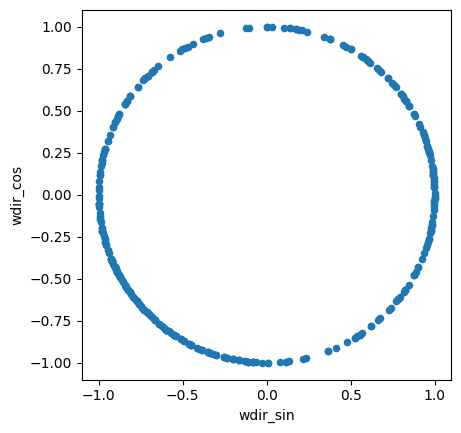

In [361]:
df_full_fixed[0:360].plot.scatter('wdir_sin', "wdir_cos").set_aspect('equal')

In [362]:
# utils function
def decode_sin_cos(sin, cos):
    """
    Function to decode prior sin and consine encoded values

    Args:
        sin: encoded sin value
        cos: encoded cos value

    Return:
        degree: value in degrees (0 - 360)
    """

    angle = np.arctan2(sin, cos)
    if angle > 0:
        angle = angle * 360 / (2*np.pi)
    else:
        angle = (2*np.pi + angle) * 360 / (2*np.pi)

    return angle


Apart from making `wdir` easier to interpret for a ML model, the transformation also shows the distribution of values. Here the main wind directions are around 90° and between 180° and 270°.

<a name="6."></a>
# 6.&nbsp;Transforming categorical features
[Content](#content)

We need to transform the columns `holiday` and `vacation` using `One-Hot-Encoding` and masking to change the categorical columns to numerical columns.

We will use `One-Hot-Encoding` for the `holiday` feature. We will use masking (replacing) for the `vacation` feature and thus only having one column for `vacation` with 1 for vacation and 0 for no vcation.

The reason for keeping only this reduced information on `vacation` has been discussed in the EDA step and is due to the similarity of the different vacations to each other and therefore distinguishing between different vacations might not add additional benefits (but could be tested nevertheless).

In [363]:
df_full_fixed["holiday"]

date
2013-01-01    Neujahr
2013-01-02        NaN
2013-01-03        NaN
2013-01-04        NaN
2013-01-05        NaN
               ...   
2022-12-27        NaN
2022-12-28        NaN
2022-12-29        NaN
2022-12-30        NaN
2022-12-31        NaN
Name: holiday, Length: 3652, dtype: object

In [382]:
def ohe_encoding(df, col):

    df_new = df.copy()

    # Remove NaN values, otherwise OHE encoder creates a new column for those values
    df_new[col] = df_new[col].replace(to_replace=pd.NA, value="")
    
    # Use One Hot Encoder only for encoding holiday feature
    OH_encoder = OneHotEncoder(sparse_output=False)
    
    # Create OHencoding
    transformed_array = OH_encoder.fit_transform(df_new[[col]])
    
    # Create temporary dataframe and concat with existing dataframe
    #df_temp = pd.DataFrame(transformed_array, index=df_new.index, columns=OH_encoder.get_feature_names_out()).drop(["holiday_nan"], axis=1).clean_names(strip_underscores="both")

    df_temp = pd.DataFrame(transformed_array, index=df_new.index, columns=OH_encoder.get_feature_names_out()).clean_names(strip_underscores="both")
    df_new = pd.concat([df_new, df_temp], axis=1)

    print("Categorical features OHE encoded")

    return df_new

In [365]:
df_full_fixed = ohe_encoding(df_full_fixed, "holiday")

In [383]:
def binary_transform_column(df, col):

    df_new = df.copy()

    # Transform `vacation` feature
    # Set the values to `0` or `1` according to mask
    df_new["transformed_vacation"] = df_new["vacation"]
    
    # Create a mask for vacation or no vacation
    mask = df_new["transformed_vacation"].isna()
    
    df_new.loc[mask, "transformed_vacation"] = 0
    df_new.loc[np.invert(mask), "transformed_vacation"] = 1
    
    df_new["transformed_vacation"] = df_new["transformed_vacation"].astype('int32')

    print("Categorical feature binary encoded")

    return df_new

In [367]:
df_full_fixed = binary_transform_column(df_full_fixed, "vacation")

<a name="7."></a>
# 7.&nbsp;Export imputed dataset
[Content](#content)

In this final step, we export the created dataset `df_full_fixed` to train a model in the next notebook.

In [368]:
df_full_fixed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
graf_moltke_straße_ostseite,3622.0,1092.194644,344.420497,13.0,853.00,1125.5,1344.75,1918.0
graf_moltke_straße_westseite,3576.0,1192.361857,400.569407,0.0,916.00,1224.0,1479.00,2136.0
hastedter_bruckenstraße,3636.0,2658.326458,1351.346180,0.0,1683.75,2534.0,3548.50,8284.0
langemarckstraße_ostseite,3639.0,2060.682056,852.346342,0.0,1438.50,2074.0,2683.00,5906.0
langemarckstraße_westseite,3651.0,1921.012051,1020.229339,0.0,1305.00,1921.0,2477.50,22263.0
...,...,...,...,...,...,...,...,...
holiday_pfingstmontag,3652.0,0.002738,0.052264,0.0,0.00,0.0,0.00,1.0
holiday_reformationstag,3652.0,0.001643,0.040505,0.0,0.00,0.0,0.00,1.0
holiday_tag_der_arbeit,3652.0,0.002738,0.052264,0.0,0.00,0.0,0.00,1.0
holiday_tag_der_deutschen_einheit,3652.0,0.002738,0.052264,0.0,0.00,0.0,0.00,1.0


In [19]:
date = datetime.date.today()

# Save the new dataset to csv and download the file
file_name = f"{date}" + "_processed_" + "df.csv"
df_full.to_csv(file_name)

<a name="8."></a>
# 8. Pipeline (Optional)

[Content](#content)

All the preprocessing steps can be chained togehter and combined into just one step. This has the benefit, that the code is musch cleaner and shorter, that no steps get missed and that all datasets have the same preprocessing steps. Additionally, it is easier to deploy a model to produciton, if all the steps are combined in a pipeline.

The below code chains all previous preprocessing functions together. 

In [384]:
from tensorflow import keras
from tensorflow.keras import layers

preprocessing = keras.Sequential(
    [
        layers.Lambda(add_time_features),
        layers.Lambda(impute_stations, arguments={"cols":STATION_NAMES}),
        layers.Lambda(impute_weather),
        layers.Lambda(sin_cos_transform),
        layers.Lambda(ohe_encoding, arguments={"col":"holiday"}),
        layers.Lambda(binary_transform_column, arguments={"col":"vacation"}),
    ]
)


To demonstrate the same resuls, we create a new DataFrame `df_full_fixed_2`, transform it with our pipeline, and compare it to our previous dataset `df_full_fixed`.

In [385]:
df_full_fixed_2 = df_full.copy()

# Apply preprocessing pipeline
df_full_fixed_2 = preprocessing(df_full_fixed_2)

Time features added
Stations imputed
Weather features imputed
Sin and cos transformation done
Categorical features OHE encoded


C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py:49: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py:49: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py:49: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py:49: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py:49: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\Mirco Rudolph\AppData\Local\Temp\ipykernel_12220\933967630.py

Categorical feature binary encoded


In [386]:
# This line of code compares to DataFrames and returns differences. An empty DataFrame returned means both DataFrames are equall.
df_full_fixed.compare(df_full_fixed_2)

date
